In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
data = pd.read_csv('CustomersData.csv')
data.head()

print("Dataset Shape:", data.shape)
print("Dataset Info:")
data.info()

Dataset Shape: (1905, 11)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1905 non-null   int64  
 1   Gender           1905 non-null   object 
 2   Ever_Married     1874 non-null   object 
 3   Age              1905 non-null   int64  
 4   Graduated        1886 non-null   object 
 5   Profession       1872 non-null   object 
 6   Work_Experience  1721 non-null   float64
 7   Spending_Score   1905 non-null   object 
 8   Family_Size      1827 non-null   float64
 9   Var_1            1887 non-null   object 
 10  Segmentation     1905 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 163.8+ KB


In [ ]:
focus_dataset = data[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation']]

label_encoder = LabelEncoder()
focus_dataset['Gender'] = label_encoder.fit_transform(focus_dataset['Gender'])
focus_dataset['Ever_Married'] = label_encoder.fit_transform(focus_dataset['Ever_Married'])
focus_dataset['Graduated'] = label_encoder.fit_transform(focus_dataset['Graduated'])
focus_dataset['Profession'] = label_encoder.fit_transform(focus_dataset['Profession'])
focus_dataset['Var_1'] = label_encoder.fit_transform(focus_dataset['Var_1'])
focus_dataset['Segmentation'] = label_encoder.fit_transform(focus_dataset['Segmentation'])

X = focus_dataset.drop('Segmentation', axis=1)
y = focus_dataset['Segmentation']


In [ ]:
categorical_columns = ['Gender', 'Ever_Married','Graduated','Profession','Spending_Score','Var_1','Segmentation']

le=LabelEncoder()

for col in categorical_columns:
  data[col]=le.fit_transform(data[col])


data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,3
1,462643,0,1,38,1,2,NaN,0,3.0,3,0
2,466315,0,1,67,1,2,1.0,2,1.0,5,1
3,461735,1,1,67,1,7,0.0,1,2.0,5,1
4,462669,0,1,40,1,3,NaN,1,6.0,5,0


In [ ]:
print(data['Spending_Score'].unique())


categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']

le = LabelEncoder()

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])


print(data['Spending_Score'].unique())

data.head()


X = data.drop('Segmentation', axis=1)
y = data['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train_imputed, y_train)

X_train_selected = selector.transform(X_train_imputed)
X_test_selected = selector.transform(X_test_imputed)

[2 0 1]
[2 0 1]


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


In [ ]:
def get_classifier(kernel_type):
    if kernel_type == 0:
        return SVC(kernel='linear')
    elif kernel_type == 1:
        return SVC(kernel='poly')
    elif kernel_type == 2:
        return SVC(kernel='rbf')

kernels = ["Linear", "Polynomial", "RBF"]
for i in range(len(kernels)):
    svclassifier = get_classifier(i)
    svclassifier.fit(X_train_scaled, y_train)
    y_pred = svclassifier.predict(X_test_scaled)
    print(f"Evaluation: {kernels[i]} kernel")
    print(classification_report(y_test, y_pred))


Evaluation: Linear kernel
              precision    recall  f1-score   support

           0       0.39      0.64      0.48       141
           1       0.35      0.11      0.17       132
           2       0.59      0.55      0.57       137
           3       0.62      0.65      0.63       162

    accuracy                           0.50       572
   macro avg       0.49      0.49      0.46       572
weighted avg       0.49      0.50      0.47       572

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.34      0.55      0.42       141
           1       0.35      0.14      0.20       132
           2       0.55      0.53      0.54       137
           3       0.63      0.61      0.62       162

    accuracy                           0.47       572
   macro avg       0.47      0.46      0.45       572
weighted avg       0.48      0.47      0.46       572

Evaluation: RBF kernel
              precision    recall  f1-score   suppo

In [ ]:
model = SVC(C=0.1, kernel='rbf')

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.67      0.46       141
           1       0.24      0.05      0.09       132
           2       0.60      0.54      0.57       137
           3       0.61      0.57      0.59       162

    accuracy                           0.47       572
   macro avg       0.45      0.46      0.43       572
weighted avg       0.46      0.47      0.44       572

Confusion Matrix:
 [[95 11  8 27]
 [71  7 39 15]
 [42  5 74 16]
 [62  6  2 92]]


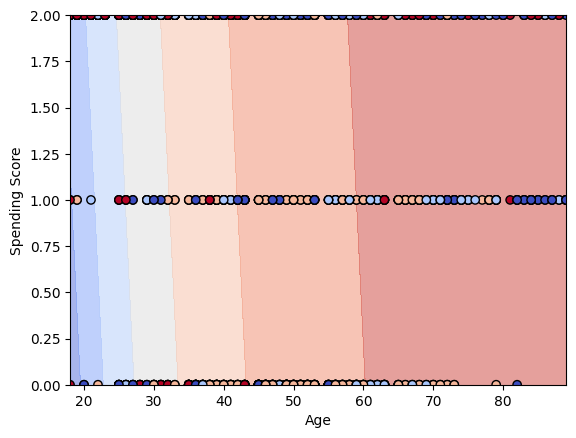

In [ ]:
focus_dataset = data[['Age', 'Spending_Score', 'Segmentation']]
X = focus_dataset.drop('Segmentation', axis=1)
y = focus_dataset['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

xx, yy = np.meshgrid(
    np.linspace(X['Age'].min(), X['Age'].max(), 400),
    np.linspace(X['Spending_Score'].min(), X['Spending_Score'].max(), 400)
)

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z[:, 0]
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
plt.scatter(X['Age'], X['Spending_Score'], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

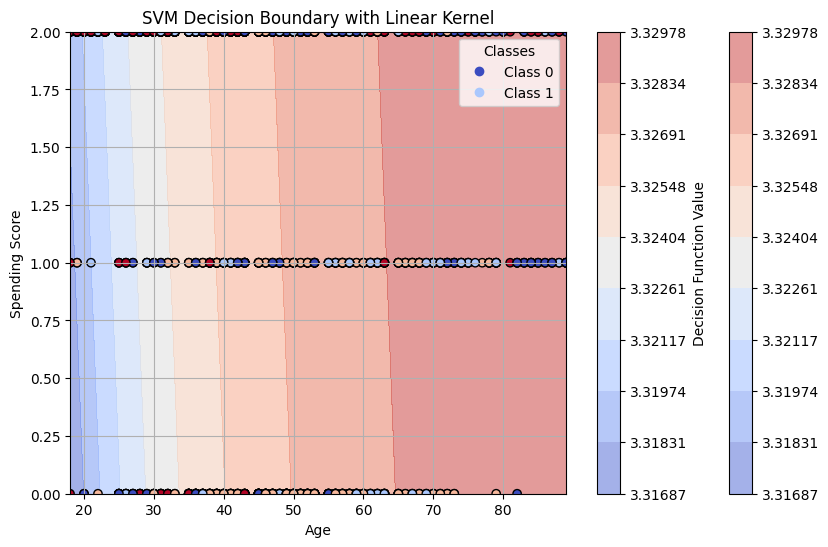

In [ ]:
plt.figure(figsize=(10, 6))
contour = plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm, levels=np.linspace(Z.min(), Z.max(), 10))
plt.colorbar(contour)
plt.colorbar(contour, label='Decision Function Value')

scatter = plt.scatter(X['Age'], X['Spending_Score'], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.xlabel('Age')
plt.ylabel('Spending Score')


plt.title('SVM Decision Boundary with Linear Kernel')
plt.grid(True)


handles, labels = scatter.legend_elements()
plt.legend(handles, ['Class 0', 'Class 1'], loc='upper right', title='Classes')

plt.show()